# Clustering cars on market - Unsupervised machine learning - Nemanja Kostić 1753
On this topic, We will try to devide cars in few clusters that will have potencial meaning that is valuable in commerc.
Dataset I have used can be found on this link: https://www.kaggle.com/datasets/manishkr1754/cardekho-used-car-data

# Libraries import

In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.covariance import EllipticEnvelope
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import plotly.graph_objs as go
from scipy.cluster import hierarchy as sch

# Data overview

- car_name - String that cointains brand + model in respective order. 
- brand, name - String values of brand and neme values.
- vehicle_age - Integer value of cars age.
- km_driven - Integer value of how many kms have car been driven.
- seller_type - Who sold a car (3 categories)
- fuel_type, transmission_type - Petrol, diesel, automatic, manual...
- mileage - Average fuel consumption.
- engine - cubic cms of engines piston.
- max_power - HP of a car.
- seats - Number of seats.
- selling_price - Price that the car is been sold.

In [89]:
data_frame = pd.read_csv("cardekho_dataset.csv")

data_frame.head()

,Unnamed: 0,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


# Data manipulation

Droped 0 rows with missing values
Droped 0 duplicate rows


Text(0.5, 1.0, 'Engine')

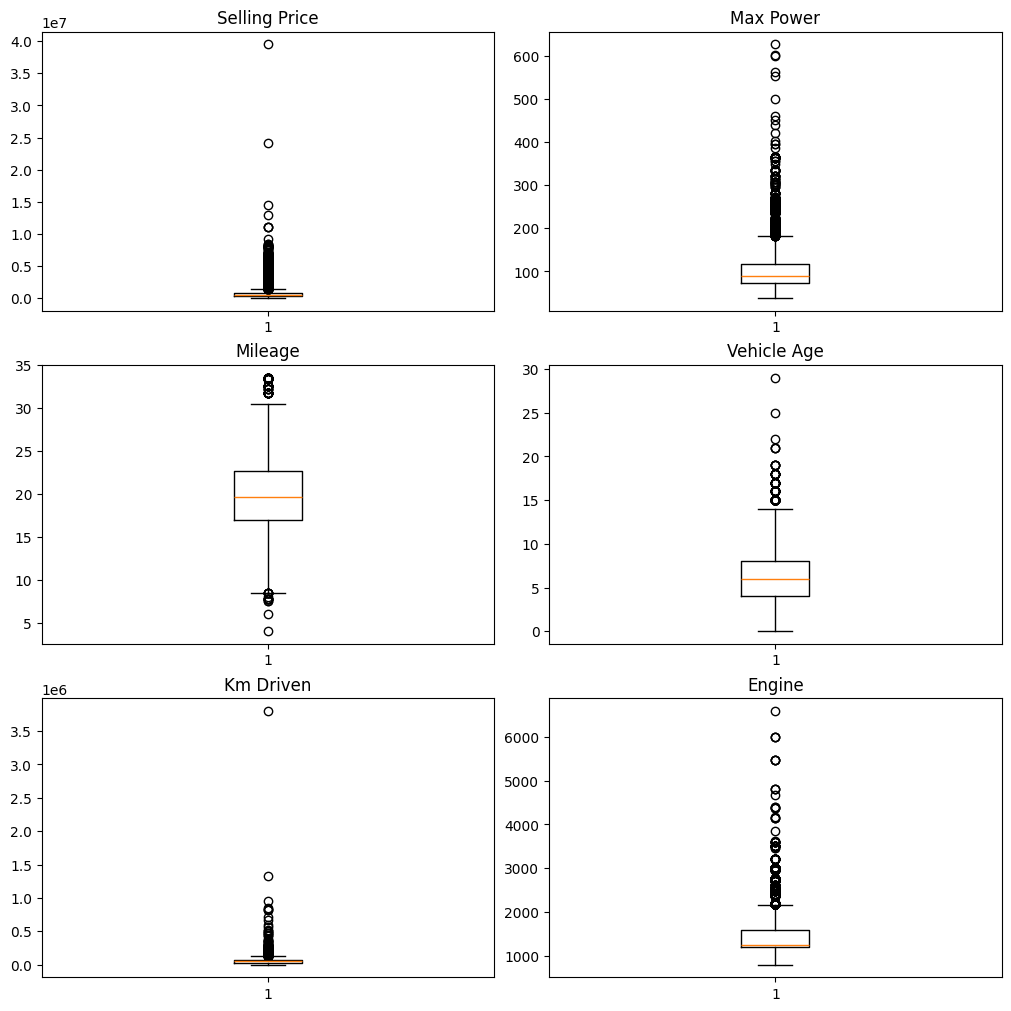

In [90]:
# Droping instances with null values, there is none
inicial_count = len(data_frame)
data_frame.dropna(inplace=True)
count_after_missig_values = len(data_frame)
print("Droped " + str(inicial_count-count_after_missig_values) + " rows with missing values")

#Deleting duplicates, 167 duplicates of 14000
inicial_count = len(data_frame)
data_frame.drop_duplicates() 
count_after_missig_values = len(data_frame)
print("Droped " + str(inicial_count-count_after_missig_values) + " duplicate rows")


numerical_features = ['vehicle_age', 'km_driven', 'selling_price', 'max_power', 'engine', 'mileage']
categorical_features = ['brand', 'seats', 'seller_type', 'fuel_type', 'transmission_type']

# Create subplots
fig, axs = plt.subplots(3, 2, figsize=(10, 10), constrained_layout=True)

# Plot each boxplot
axs[0, 0].boxplot(data_frame['selling_price'])
axs[0, 0].set_title('Selling Price')

axs[0, 1].boxplot(data_frame['max_power'])
axs[0, 1].set_title('Max Power')

axs[1, 0].boxplot(data_frame['mileage'])
axs[1, 0].set_title('Mileage')

axs[1, 1].boxplot(data_frame['vehicle_age'])
axs[1, 1].set_title('Vehicle Age')

axs[2, 0].boxplot(data_frame['km_driven'])
axs[2, 0].set_title('Km Driven')

axs[2, 1].boxplot(data_frame['engine'])
axs[2, 1].set_title('Engine')

After outliers removal

Outliers Droped: 1079


c:\Users\Nemanja\anaconda3\envs\mlenv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Nemanja\anaconda3\envs\mlenv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Nemanja\anaconda3\envs\mlenv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Nemanja\anaconda3\envs\mlenv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future

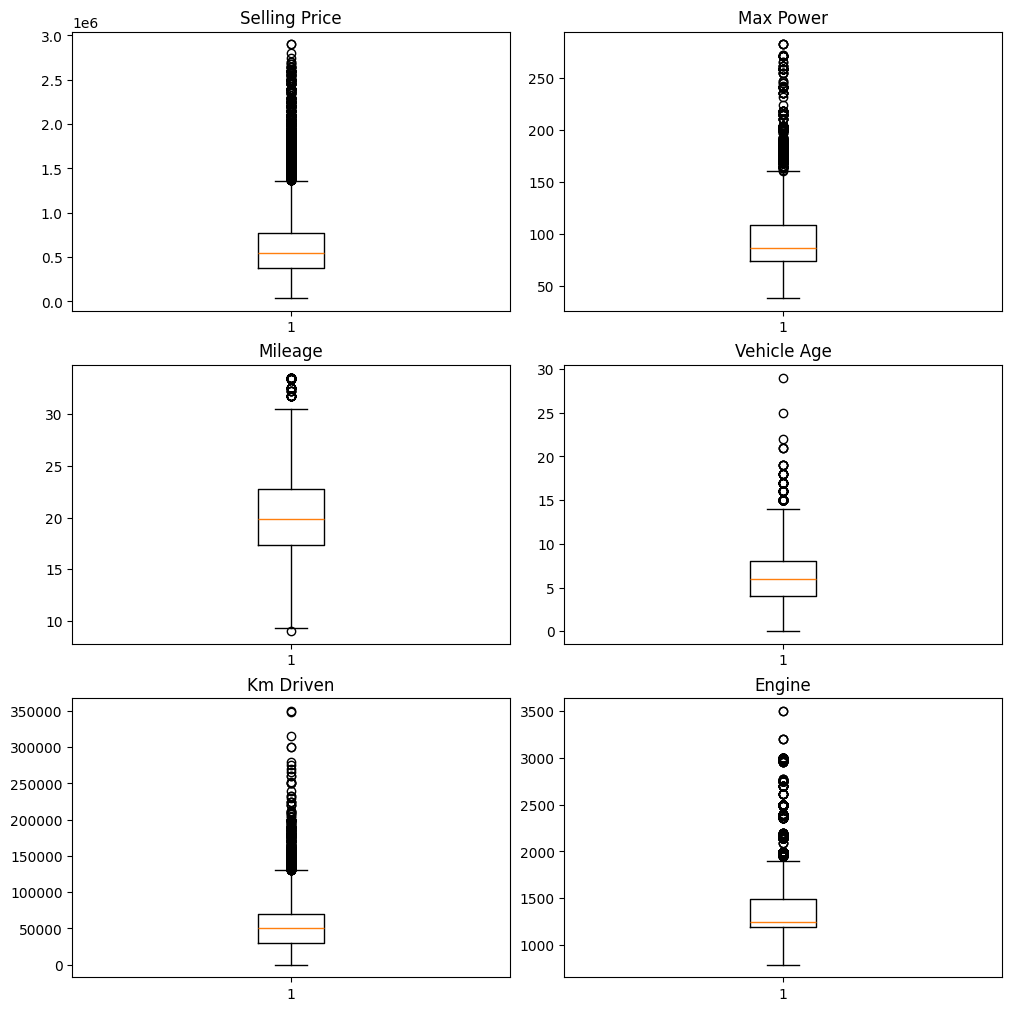

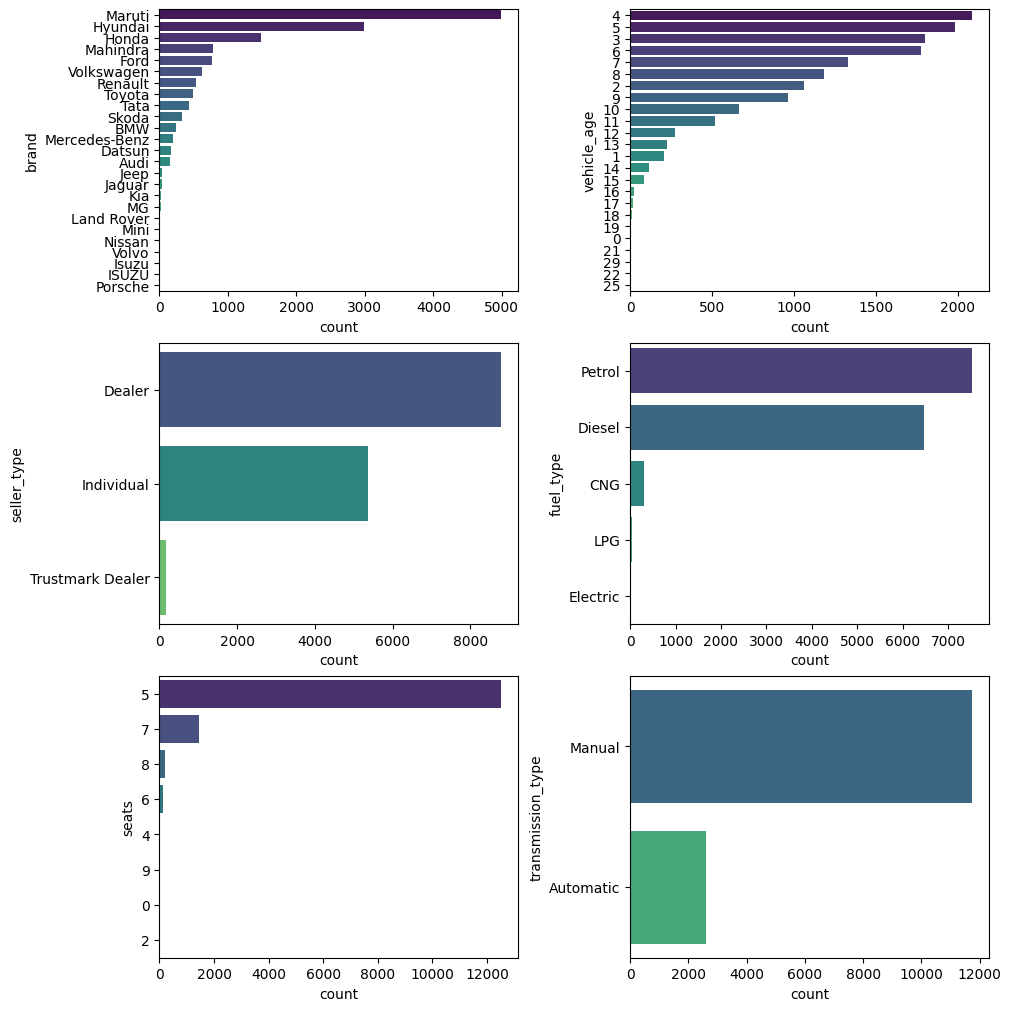

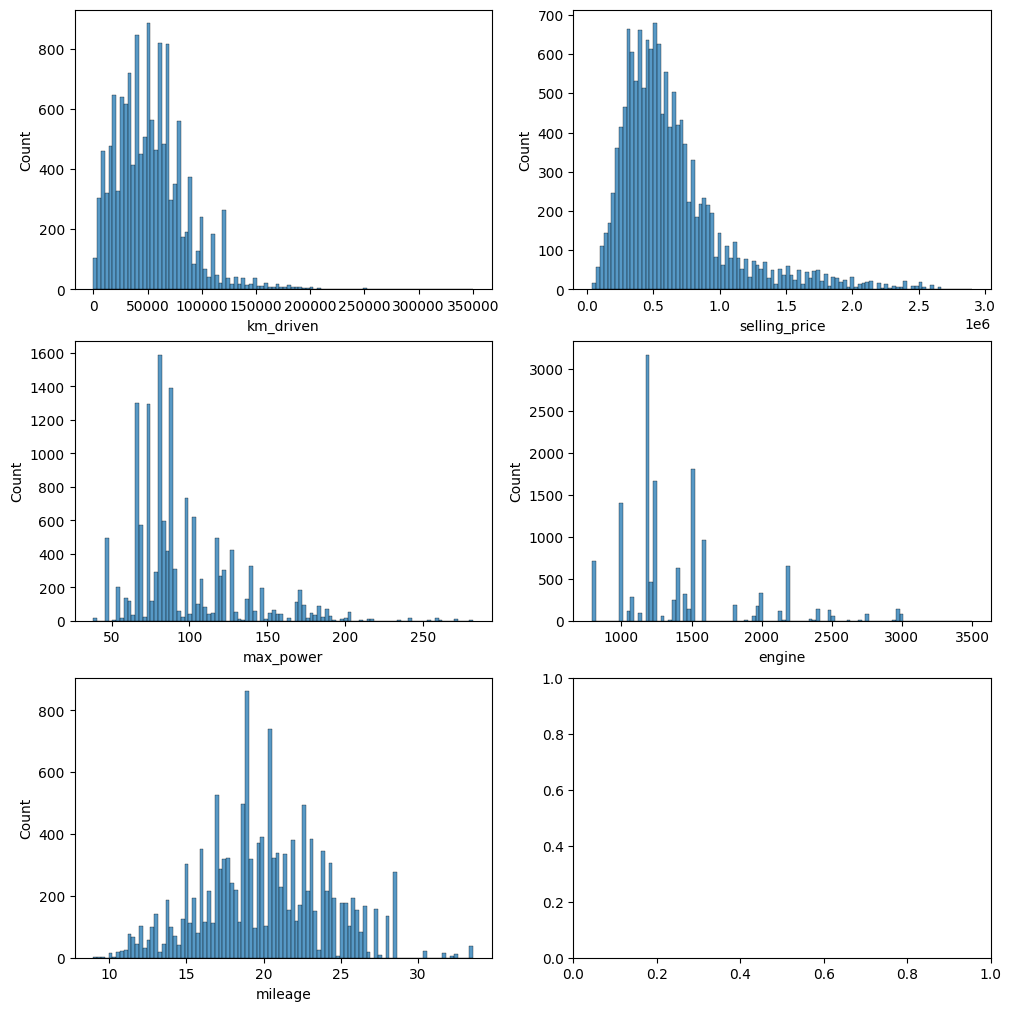

In [91]:

outlier_detector = EllipticEnvelope(contamination=.07)

# Fit detector
outlier_detector.fit(data_frame[numerical_features])

inicial_count = len(data_frame)

# Predict outliers
outliers = outlier_detector.predict(data_frame[numerical_features])

# Outliers deletation
outliers_indices = outliers == -1
data_frame = data_frame[~outliers_indices]

# Create subplots
fig, axs = plt.subplots(3, 2, figsize=(10, 10), constrained_layout=True)

# Plot each boxplot
axs[0, 0].boxplot(data_frame['selling_price'])
axs[0, 0].set_title('Selling Price')

axs[0, 1].boxplot(data_frame['max_power'])
axs[0, 1].set_title('Max Power')

axs[1, 0].boxplot(data_frame['mileage'])
axs[1, 0].set_title('Mileage')

axs[1, 1].boxplot(data_frame['vehicle_age'])
axs[1, 1].set_title('Vehicle Age')

axs[2, 0].boxplot(data_frame['km_driven'])
axs[2, 0].set_title('Km Driven')

axs[2, 1].boxplot(data_frame['engine'])
axs[2, 1].set_title('Engine')

count_after_missig_values = len(data_frame)
print("Outliers Droped: " + str(inicial_count-count_after_missig_values))

fig, axs = plt.subplots(3, 2, figsize=(10,10), constrained_layout=True)
categorical = ['brand', 'vehicle_age', 'seller_type', 'fuel_type', 'seats', 'transmission_type']
for i, f in enumerate(categorical):
    sns.countplot(y=f, data=data_frame, ax=axs[i//2][i%2], order=data_frame[f].value_counts().index, palette='viridis')

fig, axs = plt.subplots(3, 2, figsize=(10,10), constrained_layout=True)
numerical = ['km_driven', 'selling_price', 'max_power', 'engine', 'mileage']
for i, f in enumerate(numerical):
    sns.histplot(x=f, data=data_frame, ax=axs[i//2][i%2], bins=100)

In [92]:
data_frame.drop("car_name", axis=1, inplace=True)
#data_frame.drop("brand", axis=1, inplace=True)
data_frame.drop("model", axis=1, inplace=True)


# Enumerate the categorical features
brand_mapping = {brand: idx for idx, brand in enumerate(data_frame['brand'].unique())}
data_frame['brand'] = data_frame['brand'].map(brand_mapping)

fuel_type_mapping = {fuel_type: idx for idx, fuel_type in enumerate(data_frame['fuel_type'].unique())}
data_frame['fuel_type'] = data_frame['fuel_type'].map(fuel_type_mapping)

transmission_type_mapping = {trans_type: idx for idx, trans_type in enumerate(data_frame['transmission_type'].unique())}
data_frame['transmission_type'] = data_frame['transmission_type'].map(transmission_type_mapping)

transmission_type_mapping = {seller_type: idx for idx, seller_type in enumerate(data_frame['seller_type'].unique())}
data_frame['seller_type'] = data_frame['seller_type'].map(transmission_type_mapping)

transmission_type_mapping = {seats: idx for idx, seats in enumerate(data_frame['seats'].unique())}
data_frame['seats'] = data_frame['seats'].map(transmission_type_mapping)

data_frame['selling_price'] = np.digitize(data_frame['selling_price'], bins=[150000, 400000], right=True)

data_frame['km_driven'] = np.digitize(data_frame['km_driven'], bins=[30000, 110000], right=True)

# Display the enumerated data
data_frame.head()

# Extract numerical features for clustering
numerical_features = ['vehicle_age', 'max_power', 'engine', 'mileage']
categorical_features = ['brand', 'seats', 'seller_type', 'fuel_type', 'transmission_type', 'selling_price', 'km_driven']

scaler = MinMaxScaler(feature_range=(-1, 1))
data_frame[numerical_features] = scaler.fit_transform(data_frame[numerical_features])

# Shuffle dataset
data_frame_shuffled = data_frame.sample(frac=1) 
data_frame_shuffled.reset_index(drop=True, inplace=True)
data_frame_shuffled_original = pd.DataFrame(data_frame_shuffled)


### Correlation matrix

                   Unnamed: 0     brand  vehicle_age  km_driven  seller_type  \
Unnamed: 0           1.000000  0.003728     0.001167  -0.001583     0.058329   
brand                0.003728  1.000000     0.020356   0.067372     0.065933   
vehicle_age          0.001167  0.020356     1.000000   0.458182     0.036799   
km_driven           -0.001583  0.067372     0.458182   1.000000    -0.001488   
seller_type          0.058329  0.065933     0.036799  -0.001488     1.000000   
fuel_type           -0.010685  0.142219     0.028191   0.300727     0.006211   
transmission_type    0.030139  0.292415    -0.047216  -0.062965     0.169150   
mileage             -0.016871 -0.397069    -0.268329  -0.085051    -0.062055   
engine               0.012449  0.560905     0.111406   0.242365     0.090389   
max_power            0.027046  0.593281     0.050199   0.136487     0.136433   
seats               -0.016545  0.231496    -0.005285   0.097639    -0.037217   
selling_price        0.012170  0.190030 

<Axes: >

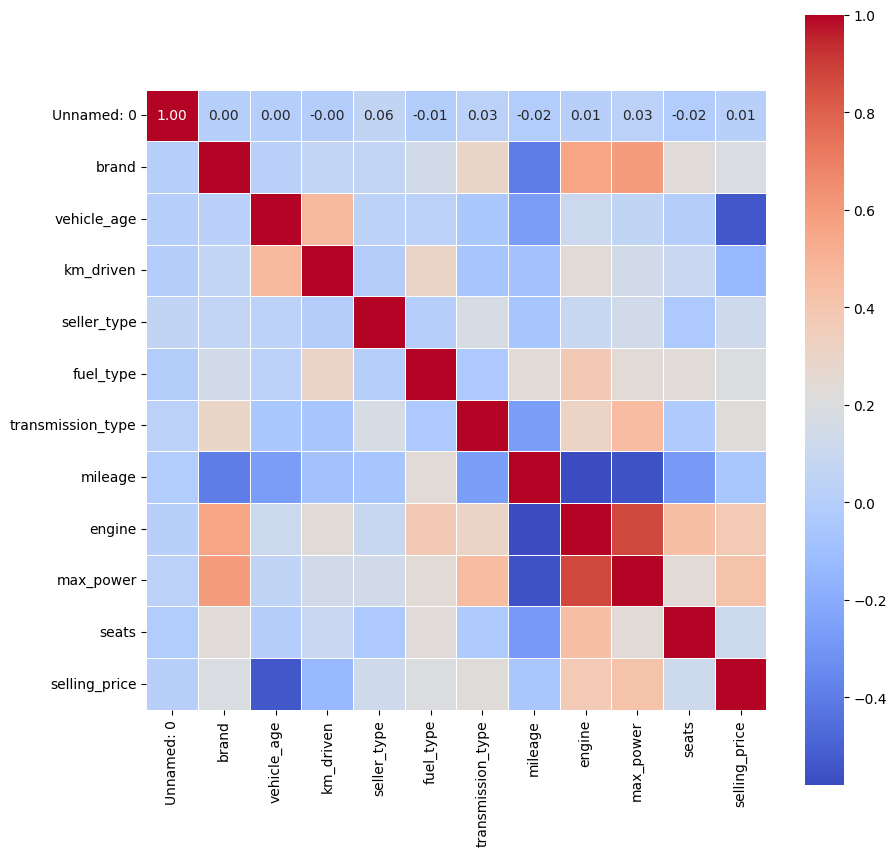

In [93]:
corr_matrix = data_frame.corr()
print(corr_matrix)
plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', square=True, cmap='coolwarm', linewidths=.5, annot_kws={"size": 10})


### Dendrogram

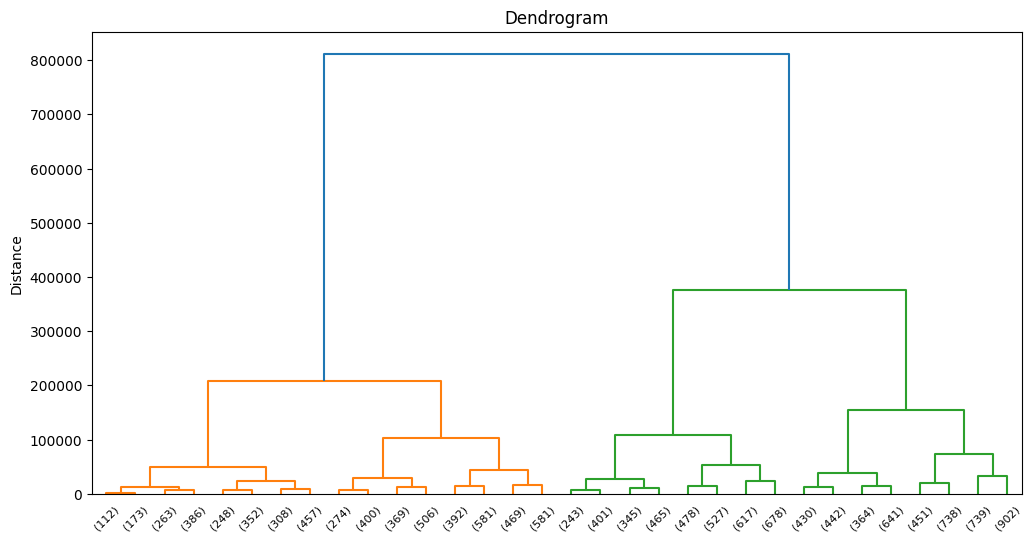

C:\Users\Nemanja\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Nemanja\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Nemanja\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Nemanja\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: 

In [94]:
# Plot the dendrogram
plt.figure(figsize=(12, 6))
dendrogram = sch.dendrogram(sch.linkage(data_frame_shuffled.values, method='ward'), truncate_mode='level', p=4)

plt.title('Dendrogram')
plt.ylabel('Distance')
plt.show()


inertia_values = []
for i in range(1, 11):  # Trying clusters from 1 to 10
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(data_frame_shuffled)
    inertia_values.append(kmeans.inertia_)


### Elbow Method for Optimal Number of Clusters

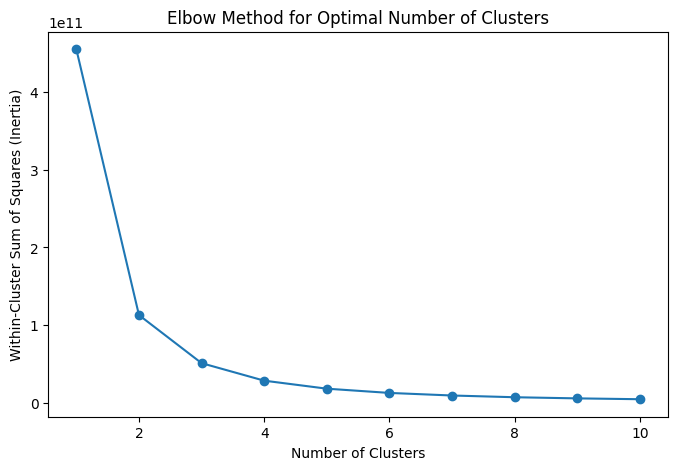

In [95]:
# Plot the elbow method
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia_values, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (Inertia)')
plt.show()


# Clustering and visualization

## K-Means

### K-Means, 3 clusters

C:\Users\Nemanja\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


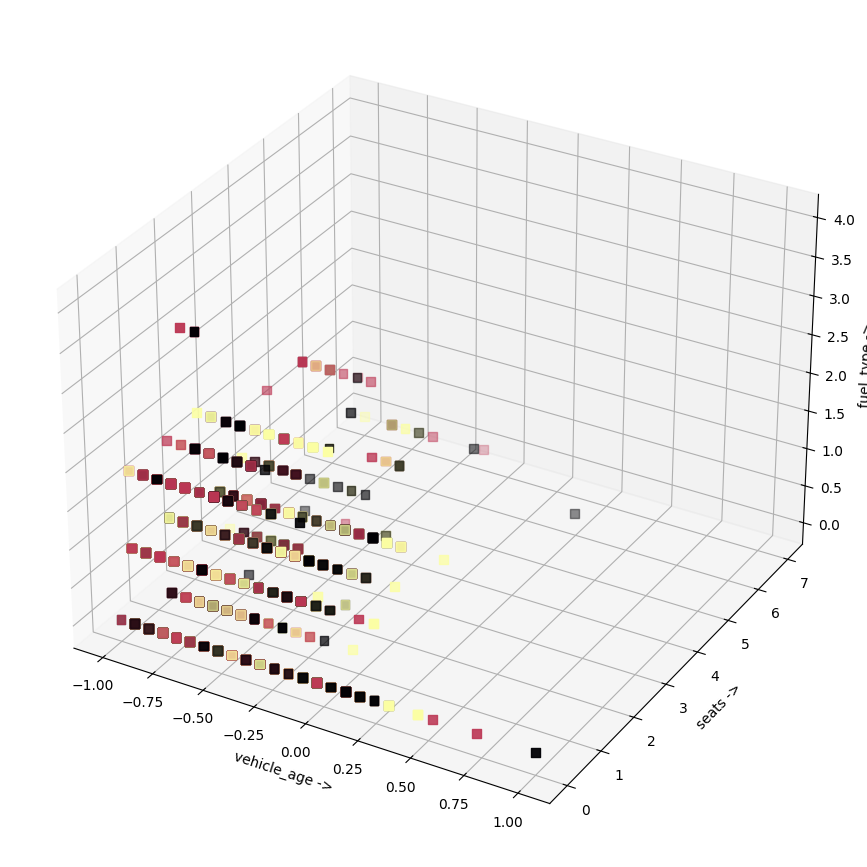

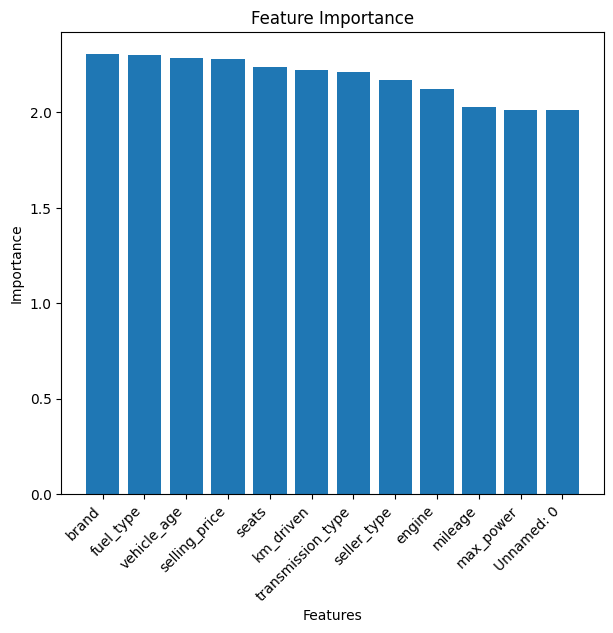

Silhouette Score: 0.59
Davies-Bouldin Index: 0.51
Calinski-Harabasz Index: 56798.73


In [96]:
# Apply K-Means clustering
num_clusters = 3  
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
data_frame_shuffled['cluster'] = kmeans.fit_predict(data_frame_shuffled)

data_frame_shuffled_original['cluster'] = data_frame_shuffled['cluster']


data_frame_shuffled_original.to_csv('result_kmeans_3clusters.csv')


fig = plt.figure(figsize = (11,11))
ax = fig.add_subplot(111, projection='3d')
x = np.array(data_frame_shuffled['vehicle_age'])
y = np.array(data_frame_shuffled['seats'])
z = np.array(data_frame_shuffled['fuel_type'])

ax.scatter(x,y,z, marker="s", c=data_frame_shuffled["cluster"], s=40, cmap="inferno", label=True)
ax.set_xlabel('vehicle_age ->')
ax.set_ylabel('seats ->')
ax.set_zlabel('fuel_type ->')

plt.show()


# Compute mean values of features within each cluster
cluster_means = data_frame_shuffled.groupby('cluster').mean()

# Calculate feature importance by comparing mean values across clusters
feature_importance = cluster_means.sub(cluster_means.mean()).abs().sum() / cluster_means.std()

# Sort features by importance
feature_importance_sorted = feature_importance.sort_values(ascending=False)

# Plot feature importance
plt.figure(figsize=(7, 6))
plt.bar(feature_importance_sorted.index, feature_importance_sorted)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.xticks(rotation=45, ha='right')
plt.show()

# 3d scatterplot using plotly
Scene = dict(xaxis = dict(title  = 'vehicle_age ->'),yaxis = dict(title  = 'seats ->'),zaxis = dict(title  = 'fuel_type ->'))
labels = kmeans.labels_
trace = go.Scatter3d(x=data_frame_shuffled['vehicle_age'], y=data_frame_shuffled['seats'], z=data_frame_shuffled['fuel_type'], mode='markers',marker=dict(color = labels, size= 10, line=dict(color= 'black',width = 10)))
layout = go.Layout(margin=dict(l=0,r=0),scene = Scene,height = 800,width = 800)
data = [trace]
fig = go.Figure(data = data, layout = layout)
fig.show()


# Calculate clustering metrics
silhouette = silhouette_score(data_frame_shuffled, kmeans.labels_)
db_index = davies_bouldin_score(data_frame_shuffled, kmeans.labels_)
ch_index = calinski_harabasz_score(data_frame_shuffled, kmeans.labels_)

 
# Print the metric scores
print(f"Silhouette Score: {silhouette:.2f}")
print(f"Davies-Bouldin Index: {db_index:.2f}")
print(f"Calinski-Harabasz Index: {ch_index:.2f}")

### K-Means, 4 clusters

## DBSCAN

### DBSCAN, 3 clusters

### DBSCAN, 4 clusters

## Agglomerative 

## GMM

# Comparison